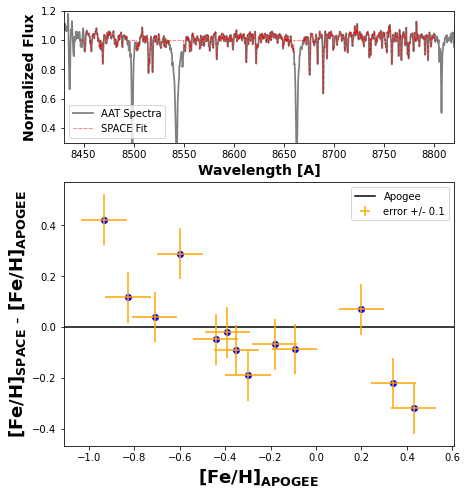

In [13]:
import sys
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import csv
from scipy.stats import kde
import pandas as pd
from matplotlib import gridspec


myfile = pd.read_csv('/home/smu/Carlos/APOGEE_STDS/Nazgul/bh261_1_236.fitscorrected.out', delimiter = ' ')


myfile.columns = ["space","lambda", "flux"]

x = myfile['lambda']
y = myfile['flux']
#print(y)

yourfile = pd.read_csv('/home/smu/Carlos/SPACE/space_cc_model.dat', delimiter = '\s+')
yourfile.columns = ["one", "two", "three", "four", "five", "six", "seven"]

x1 = yourfile['one']
y1 = yourfile['two']

fig = plt.figure(figsize = (7,8))
gs = gridspec.GridSpec(2,1, height_ratios = [0.75,1.5])
#plt.figure(figsize=(7,3))
axis1 = fig.add_subplot(gs[0])
axis1.plot(x,y, color = 'grey', linewidth = 1.75, label = 'AAT Spectra')
axis1.plot(x1,y1, linestyle = '-.', linewidth = .5, color = 'red', label = 'SPACE Fit')
axis1.set_xlabel('Wavelength [A]', fontsize = 14, fontweight = "bold")
axis1.set_ylabel('Normalized Flux', fontsize = 14, fontweight = "bold")
axis1.set_ylim([0.3,1.2])
axis1.set_xlim([8430,8820])
axis1.legend()



myfile = pd.read_csv('/home/smu/Carlos/SPACE/apogee_results/apogee_space_control.out', delimiter = ',', comment='#')

Name_SPACE = myfile['Spectra_name']
FeH_SPACE = myfile['Fe']



ap_stds = pd.read_csv('/home/smu/Carlos/APOGEE_STDS/stdsA.dat', comment='#', delimiter= ',')

Name_ap = ap_stds['Spectra_name']
FeH_ap = ap_stds['FE_H']

FeDiff=[]
FeTrue=[]

for i in range(0, len(myfile)):
    if Name_SPACE[i] == Name_ap[i]:
        FeDiff.append(FeH_SPACE[i] - FeH_ap[i])
        FeTrue.append(FeH_ap[i])

        Fe_avgdiff = np.mean(FeDiff)
        Fe_avediffstd = np.std(FeDiff)
        
axis2 = fig.add_subplot(gs[1])

axis2.plot(FeTrue, FeDiff, ".", markersize=12, color = 'blue')
axis2.axhline(y=0, color='k', linestyle = '-', label = 'Apogee')

axis2.set_xlabel(r"$\bf[Fe/H]_{APOGEE}$", fontsize = 18)
axis2.set_ylabel(r"$\bf[Fe/H]_{SPACE}$ - $\bf[Fe/H]_{APOGEE}$", fontsize = 18)
axis2.errorbar(FeTrue, FeDiff, yerr = 0.1, xerr = 0.1, fmt='None', color = 'orange', label = 'error +/- 0.1')
axis2.legend()

#print(Fe_avgdiff, Fe_avediffstd)
fig.savefig('bh261_fd.pdf')